In [3]:
# Capstone Project: Layoffs Across Industries in the U.S.
# Dataset Source: https://www.kaggle.com/datasets/salimwid/layoffs-2022


# 1. Import Libraries
# -------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.colab import files
import io


# 2. Load Dataset
# -------------------------------------------
# NOTE: 'layoffs.csv has to be downloaded from Kaggle and uploaded via Choose Files button'

file_path = "layoffs.csv"
uploaded = files.upload()  # This will prompt you to upload a file
df = pd.read_csv(io.BytesIO(uploaded['layoffs.csv']))
print(df.head(20))

Saving layoffs.csv to layoffs.csv
             company total_laid_off percentage_laid_off reported_date  \
0               C2FO             20                   2     12/9/2022   
1           VideoAmp        Unclear                   2     9/19/2022   
2           Amperity             13                   3     8/20/2022   
3            Addepar             20                   3     1/18/2023   
4     Thirty Madison             24                   3     5/13/2022   
5           NextRoll        Unclear                   3      7/8/2022   
6     Armis Security             25                   4     12/8/2022   
7            Foxtrot             26                   4     9/23/2022   
8   Headspace Health             50                   4    12/14/2022   
9           RealSelf             11                   5     7/21/2022   
10         New Relic            110                   5     8/18/2022   
11              Abra             12                   5     6/30/2022   
12    Clarify Hea

In [4]:
# 3. Initial Exploration
# -------------------------------------------
print(df.head())
print(df.info())


          company total_laid_off percentage_laid_off reported_date  \
0            C2FO             20                   2     12/9/2022   
1        VideoAmp        Unclear                   2     9/19/2022   
2        Amperity             13                   3     8/20/2022   
3         Addepar             20                   3     1/18/2023   
4  Thirty Madison             24                   3     5/13/2022   

                  industry headquarter_location                       sources  \
0        Fintech, payments          Leawood, KS  Kansas City Business Journal   
1    Advertising platforms          Los Angeles                  Company memo   
2          Saas, analytics              Seattle                      Geekwire   
3  fintech, data analytics    Mountain View, CA                       Fortune   
4              Health Care             New York                         Axios   

    status                                   additional_notes  
0  Private                  

In [5]:
# 4. Data Cleaning and Transformation
# -------------------------------------------

# Drop rows with missing values in key numeric columns
df.dropna(subset=['total_laid_off', 'percentage_laid_off'], inplace=True)

# Drop rows with Non-Numeric Values in total_laid_off column
df = df[df["total_laid_off"].apply(lambda x: str(x).isnumeric())]
df = df[df["percentage_laid_off"].apply(lambda x: str(x).isnumeric())]

df = df.dropna(subset=["total_laid_off"])
df = df.dropna(subset=["percentage_laid_off"])

print(df.info())
# Group by industry and calculate total layoffs
df_industry = df.groupby('industry')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)

print(df_industry.head(20))



<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 463
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company               240 non-null    object
 1   total_laid_off        240 non-null    object
 2   percentage_laid_off   240 non-null    object
 3   reported_date         240 non-null    object
 4   industry              240 non-null    object
 5   headquarter_location  240 non-null    object
 6   sources               240 non-null    object
 7   status                240 non-null    object
 8   additional_notes      8 non-null      object
dtypes: object(9)
memory usage: 18.8+ KB
None
                                      industry total_laid_off
19                Cloud computing, web hosting             95
23                                Crowdfunding             94
143                  personal health, wellness             90
85                         Media/entertainment           

In [ ]:
# 5. Statistical Analysis
# -------------------------------------------
# Convert 'total_laid_off' and 'percentage_laid_off' to numeric (handle non-numeric like 'Unclear')
df['total_laid_off'] = pd.to_numeric(df['total_laid_off'], errors='coerce')
df['percentage_laid_off'] = pd.to_numeric(df['percentage_laid_off'], errors='coerce')

# 1. Descriptive statistics on layoffs and percentage laid off
layoff_stats = df[['total_laid_off', 'percentage_laid_off']].describe()
print("=== Descriptive Statistics ===")
print(layoff_stats)

# 2. Top industries by average total layoffs
industry_avg_layoffs = (
    df.groupby('industry')['total_laid_off']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={'total_laid_off': 'avg_layoffs'})
)

print("\n=== Top Industries by Average Layoffs ===")
print(industry_avg_layoffs)

=== Descriptive Statistics ===
       total_laid_off  percentage_laid_off
count      240.000000           240.000000
mean       353.370833            19.820833
std       1441.051197            18.258178
min          5.000000             1.000000
25%         43.750000             8.000000
50%         92.000000            15.000000
75%        170.750000            25.000000
max      18000.000000           100.000000

=== Top Industries by Average Layoffs ===
                        industry  avg_layoffs
0               E-commerce, SaaS      18000.0
1      enterprise software, SaaS       4100.0
2                   Social media       3105.0
3                   Social Media       1882.5
4                    Hospitality       1000.0
5  health care, health insurance        800.0
6                AI, health care        750.0
7       CRM, enterprise software        700.0
8               Auto, E-commerce        647.0
9         shipping and logistics        640.0


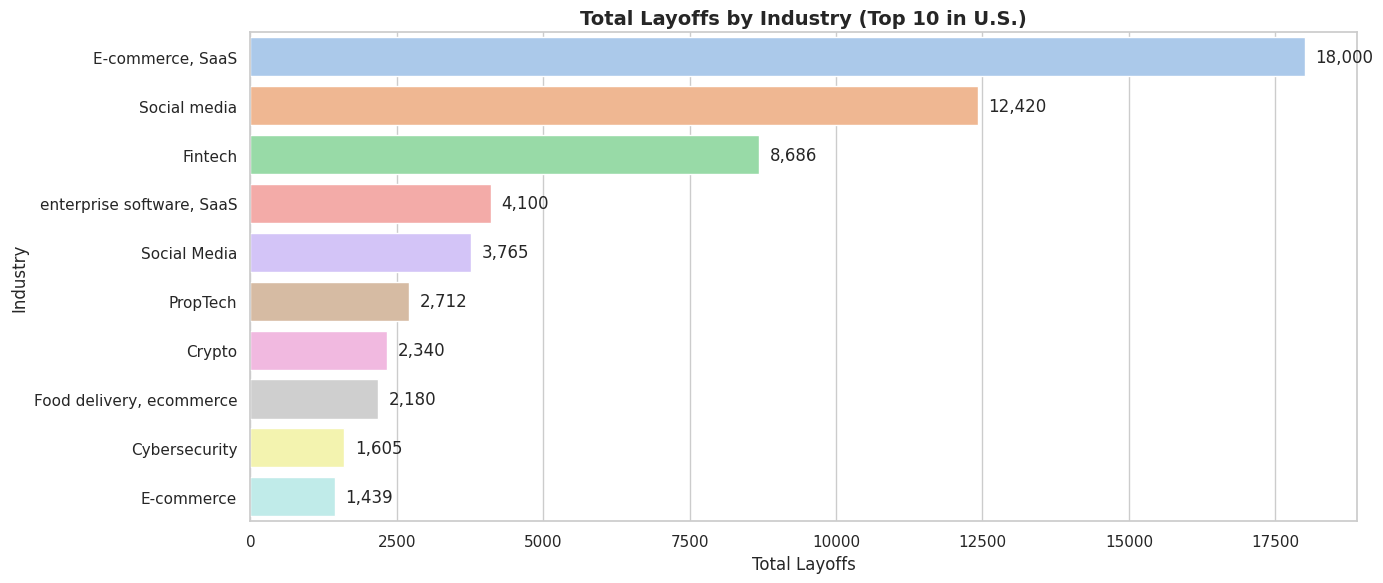

In [ ]:
# 6.1 Visualization: Total Layoffs by Industry
# -------------------------------------------
df['total_laid_off'] = pd.to_numeric(df['total_laid_off'], errors='coerce')
df_clean = df.dropna(subset=['total_laid_off'])

# Group by industry and sum layoffs
df_industry = (
    df_clean.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).reset_index()
)
sns.set(style='whitegrid')

# Plot the top 10 industries
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_industry.head(10), x='total_laid_off', y='industry', hue='industry', palette='pastel'
)

# Add number labels on bars
max_layoffs = df_industry['total_laid_off'].max()
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + max_layoffs * 0.01,
                p.get_y() + p.get_height() / 2,
                f'{int(width):,}',
                va='center')

# Title and labels
ax.set_title('Total Layoffs by Industry (Top 10 in U.S.)', fontsize=14, weight='bold')
ax.set_xlabel('Total Layoffs', fontsize=12)
ax.set_ylabel('Industry', fontsize=12)

plt.tight_layout()
plt.show()

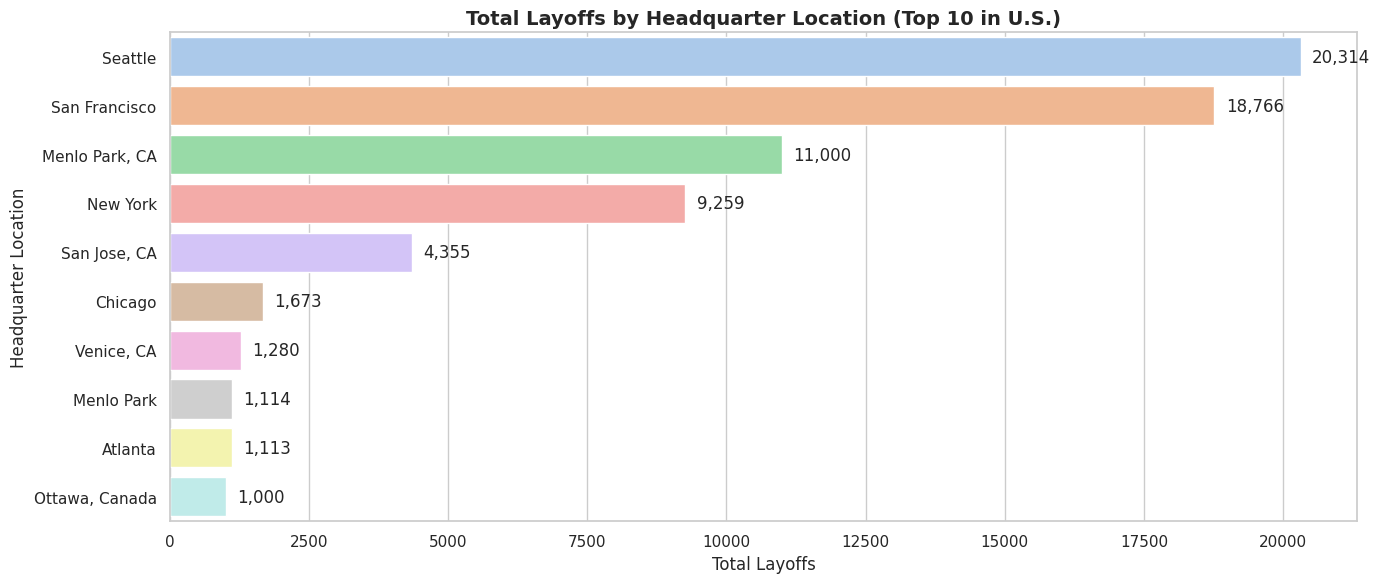

In [ ]:
# 6.2 Visualization: Total Layoffs by Location
# -------------------------------------------
# Ensure 'total_laid_off' is numeric
df['total_laid_off'] = pd.to_numeric(df['total_laid_off'], errors='coerce')

# Drop rows where either total_laid_off or headquarter_location is missing
df_clean_geo = df.dropna(subset=['total_laid_off', 'headquarter_location'])

# Group by headquarter location and sum layoffs
df_location = (df_clean_geo.groupby('headquarter_location')['total_laid_off'].sum().sort_values(ascending=False).reset_index())

# Plot the top 10 locations
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_location.head(10),x='total_laid_off',y='headquarter_location',hue = 'headquarter_location',palette='pastel')

# Add number labels on bars
max_layoffs_loc = df_location['total_laid_off'].max()
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + max_layoffs_loc * 0.01,
                p.get_y() + p.get_height() / 2,
                f'{int(width):,}',
                va='center')

# Title and labels
ax.set_title('Total Layoffs by Headquarter Location (Top 10 in U.S.)', fontsize=14, weight='bold')
ax.set_xlabel('Total Layoffs', fontsize=12)
ax.set_ylabel('Headquarter Location', fontsize=12)

plt.tight_layout()
plt.show()

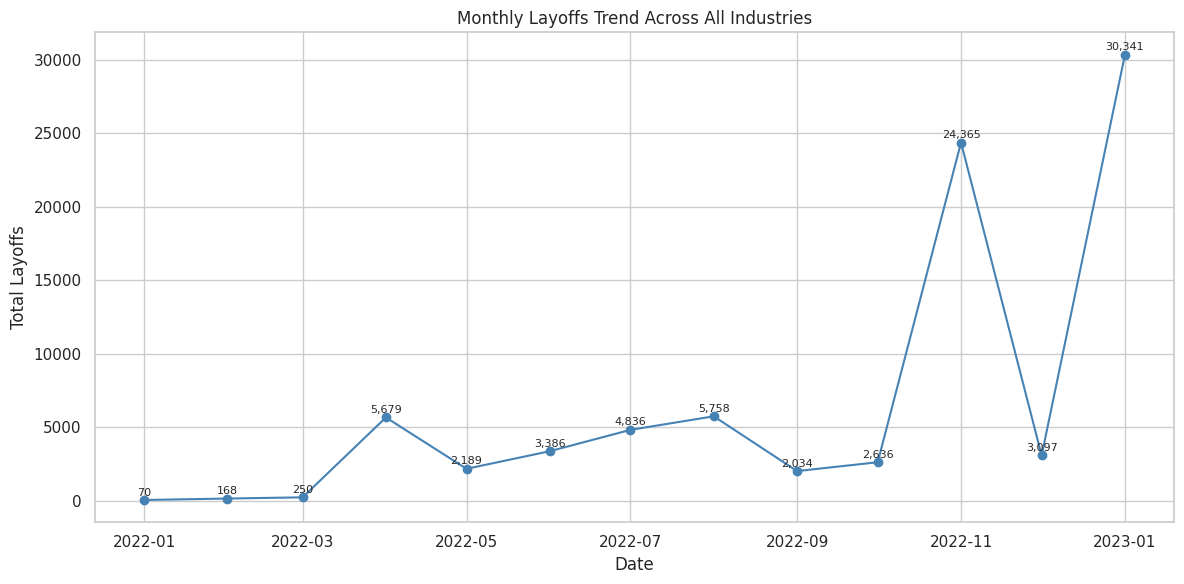

In [ ]:
# Convert reported_date to datetime
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')
# Create 'year_month' as a period
df['year_month'] = df['reported_date'].dt.to_period('M')
# Group by year and month and calculate total layoffs across all industries
df_monthly_all_industries = df.groupby(['year_month'])['total_laid_off'].sum().reset_index()
# Convert 'year_month' to datetime for plotting
df_monthly_all_industries['year_month'] = df_monthly_all_industries['year_month'].dt.to_timestamp()
# plt.figure(figsize=(12, 6))
# plt.plot(df_monthly_all_industries['year_month'], df_monthly_all_industries['total_laid_off'], marker='o' )

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_all_industries['year_month'], df_monthly_all_industries['total_laid_off'], marker='o', color='steelblue')

# Add text annotations for each point
for x, y in zip(df_monthly_all_industries['year_month'], df_monthly_all_industries['total_laid_off']):
    plt.text(x, y + df_monthly_all_industries['total_laid_off'].max() * 0.01, f'{int(y):,}', ha='center', fontsize=8)

plt.title('Monthly Layoffs Trend Across All Industries')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explanation:
# This line plot trend of total layoffs per month across all industries.

# -------------------------------------------
# 8. Conclusion
# -------------------------------------------
# The technology sector—including sub-industries like SaaS, fintech, and analytics—recorded the highest total number of layoffs.

# The top headquarter locations for layoffs were:

# San Francisco
# New York
# Los Angeles
# Seattle
# Silicon Valley cities like Mountain View and Palo Alto
# These cities align with major tech and startup ecosystems, suggesting geographic concentration of workforce reductions.

# End of Notebook

In [ ]:
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')
df['year_month'] = df['reported_date'].dt.to_period('M')
df_monthly_all_industries = df.groupby(['year_month'])['total_laid_off'].sum().reset_index()
df_monthly_all_industries['year_month'] = df_monthly_all_industries['year_month'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_all_industries['year_month'], df_monthly_all_industries['total_laid_off'], marker='o', color='steelblue')
for x, y in zip(df_monthly_all_industries['year_month'], df_monthly_all_industries['total_laid_off']):
    plt.text(x, y + df_monthly_all_industries['total_laid_off'].max() * 0.01, f'{int(y):,}', ha='center', fontsize=8)